# 確率的勾配降下法とその派生系

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import * #コンタ描画用
# import myplotly

### [演習]
* 以下の各最適化手法のクラスを完成させましょう  
    SGD  
    Momentum  
    NesterovAG  
    Adagrad  
    RMSProp  
    Adadelta  
    Adam  


### 確率的勾配降下法(Stochastic Gradient Descent)
* SGDの更新式  
  
    $\displaystyle {\boldsymbol \theta}_{t+1} = {\boldsymbol \theta}_t - \eta \frac{\partial L}{\partial {\boldsymbol \theta}_t}$  
      
    ${\boldsymbol \theta}$ : 重み  
    $L$ : 損失  
    $\eta$ : 学習率  

In [2]:
class SGD:
    """
    Stochastic Gradient Descent
    """
    def __init__(self, lr=0.01):
        """
        lr : 学習係数 learning rate
        """
        self.lr = lr
        
    def update(self, params, grads):
        """
        重みの更新
        """
        for key in params.keys():
            params[key] -= self.lr * grads[key]

### Momentum
* Momentumの更新式  
  
    $\displaystyle {\boldsymbol v}_{t+1} = \alpha {\boldsymbol v}_t - \eta \frac{\partial L}{\partial {\boldsymbol \theta}_t}$  
    $\displaystyle {\boldsymbol \theta}_{t+1} = {\boldsymbol \theta}_t + {\boldsymbol v}_{t+1}$  
      
    $\boldsymbol \theta$ : 重み    
    $L$ : 損失  
    $\eta$ : 学習率  
    $\alpha$ : モーメンタム係数(0以上1未満)

In [3]:
class Momentum:
    """
    Momentum
    """
    def __init__(self, lr=0.01, momentum=0.9):
        """
        lr : 学習係数 learning rate
        momentm : モーメンタム係数
        """
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        """
        重みの更新
        """
        if self.v is None:
            """
            初回のみ
            """
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]            
            params[key] += self.v[key]
       

###  Nesterov Accelerated Gradient
* Nesterov Accelerated Gradientの更新式(定義)  
  
    $\displaystyle {\boldsymbol v}_{t+1} = \alpha {\boldsymbol v}_t - \eta \frac{\partial L}{\partial ({\boldsymbol \theta}_t+\alpha {\boldsymbol v}_t)}$  
    $\displaystyle {\boldsymbol \theta}_{t+1} = {\boldsymbol \theta}_t + {\boldsymbol v}_{t+1}$  
      
    $\boldsymbol \theta$ : 重み  
    $L$ : 損失  
    $\eta$ : 学習率  
    $\alpha$ : モーメンタム係数(0以上1未満)
      
        
    * Momentumの改良版。次の仮の位置を求め、その位置の勾配を利用する。
    * http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf
    * https://www.cs.utoronto.ca/~ilya/pubs/ilya_sutskever_phd_thesis.pdf
    * https://arxiv.org/pdf/1212.0901v2.pdf
    
* Nesterov Accelerated Gradientの更新式(実装) 
  
    $\displaystyle {\boldsymbol \Theta}_{t+1} = {\boldsymbol \theta}_{t+1} + \alpha {\boldsymbol v}_{t+1}$とおくと、  
    $\displaystyle {\boldsymbol \Theta}_{t} = {\boldsymbol \theta}_{t} + \alpha {\boldsymbol v}_{t}$ なので、定義式は以下のように変形できる
    
    $\displaystyle {\boldsymbol v}_{t+1} = \alpha {\boldsymbol v}_t - \eta \frac{\partial L}{\partial {\boldsymbol \Theta}_t}$  
      
    $\displaystyle {\boldsymbol \Theta}_{t+1} = {\boldsymbol  \Theta}_{t} - \alpha {\boldsymbol v}_t + \alpha {\boldsymbol v}_{t+1} + {\boldsymbol v}_{t+1}$  
    $\displaystyle  ~~~~~~~  = {\boldsymbol \Theta}_{t} - \alpha {\boldsymbol v}_t + (\alpha+1) {\boldsymbol v}_{t+1}$    
    $\displaystyle  ~~~~~~~  = {\boldsymbol \Theta}_{t} - \alpha {\boldsymbol v}_t + (\alpha+1)  \biggl( \alpha {\boldsymbol v}_t - \eta \frac{\partial L}{\partial {\boldsymbol  \Theta}_t} \biggr)$        
    $\displaystyle  ~~~~~~~ = {\boldsymbol  \Theta}_{t} + \alpha\alpha {\boldsymbol v}_t - (1+\alpha) \eta \frac{\partial L}{\partial {\bf \Theta}_t} $  
    $\displaystyle  ~~~~~~~ = {\boldsymbol  \Theta}_{t} + \alpha \biggl(\alpha {\boldsymbol  v}_t - \eta \frac{\partial L}{\partial {\boldsymbol  \Theta}_t} \biggr) - \eta \frac{\partial L}{\partial {\boldsymbol  \Theta}_t}$      
      
    $\boldsymbol \theta$ : 重み  
    $L$ : 損失  
    $\eta$ : 学習率  
    $\alpha$ : モーメンタム係数(0以上1未満)
    
[chainerでの実装] :   https://github.com/chainer/chainer/blob/master/chainer/optimizers/nesterov_ag.py  
[kearaでの実装] :   
https://github.com/keras-team/keras/blob/master/keras/optimizers.py#L74  
[theanoでの実装] :   https://gist.github.com/kastnerkyle/816134462577399ee8b2  
[nnablaでの実装] :   https://github.com/sony/nnabla/blob/master/src/nbla/solver/generic/nesterov.cpp


In [4]:
class NesterovAG:
    """
    Nesterov Accelerated Gradient
    """
    def __init__(self, lr=0.01, momentum=0.9):
        """
        lr : 学習係数 learning rate
        momentm : モーメンタム係数
        """
        self.lr = lr
        self.momentum = momentum
        self.v = None
        
    def update(self, params, grads):
        """
        重みの更新
        """
        if self.v is None:
            """
            初回のみ
            """
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)
                
        # 重みを更新
        for key in params.keys():
            v_pre = self.v[key] 
#             print("id of self.v[key]=",id(self.v[key]), "id of v_pre=", id(v_pre))  # idは同じになる
            self.v[key] = self.momentum * v_pre - self.lr * grads[key] # self.v[key]にnumpy配列を代入すると、v_preとself.v[key]は別オブジェクトとなる
#             print("id of self.v[key]=",id(self.v[key]), "id of v_pre=", id(v_pre)) # idは異なる
            print(v_pre , self.v[key])
            params[key] += -self.momentum* v_pre + (self.momentum+1) * self.v[key]

In [5]:
# ヒント
# アダマール積
a = np.array([[1,2],[3,4]])
print(a, "\n")
print(a*a)

[[1 2]
 [3 4]] 

[[ 1  4]
 [ 9 16]]


### AdaGrad
* AdaGradの更新式  
  
    $\displaystyle {\boldsymbol  h}_{t+1} = {\boldsymbol  h}_{t} + \frac{\partial L}{\partial {\boldsymbol  \theta}_t} \odot \frac{\partial L}{\partial {\boldsymbol  \theta}_t}$  
    $\displaystyle {\boldsymbol \theta}_{t+1} = {\boldsymbol \theta}_t - \eta \frac{1}{ \epsilon + \sqrt{{\boldsymbol  h}_{t+1}}} \odot \frac{\partial L}{\partial {\boldsymbol  \theta}_t}$  
      
    $\boldsymbol  \theta$ : 重み    
    $L$ : 損失  
    $\eta$ : 学習率  
    $\epsilon$ : 計算を安定化させるための定数. Goodfellow著の深層学習では1e-7    
    $\odot$ : アダマール積記号(同じ要素同士の掛け算)  
      
      
    * hは必ず正の値になる
    * 計算が進むにつれてhは大きくなる =これまで経験した勾配の値を2乗和として保持  
    * hが大きくなると、みかけの学習率が小さくなり、Wの更新が遅くなる(=>学習が進まなくなることも)
    * 重みごとに更新速度が変わるところがポイント
    * これまでの勾配の積算量が大きくなると、更新速度が遅くなっていく


In [6]:
class Adagrad:
    """
    Adagrad
    """
    def __init__(self, lr=0.01):
        """
        lr : 学習係数 learning rate
        """
        self.lr = lr
        self.h = None
        self.epsilon = 1e-7
        
    def update(self, params, grads):
        """
        重みの更新
        """
        if self.h is None:
            """
            初回のみ
            """
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] += grads[key] * grads[key]          
            params[key] -= self.lr * grads[key] / (self.epsilon + np.sqrt(self.h[key]) )

### AdaDelta
* AdaDeltaの更新式  

    $\displaystyle {\boldsymbol g}_t = \frac{\partial L}{\partial {\boldsymbol \theta}_t}$
      
     勾配の2乗の移動平均を求める  
    $\displaystyle {\boldsymbol h}_{t+1} = \rho{\boldsymbol h}_{t} + (1-\rho){\boldsymbol g}_t \odot {\boldsymbol g}_t$   
       
     1ステップ前における更新量の2乗の移動平均のルートを求める  
     ${\boldsymbol rms\_param} = \sqrt{{\boldsymbol r}_{t} + \epsilon}$  
         
     勾配の2乗の移動平均のルートを求める  
     ${\boldsymbol rms\_grad} = \sqrt{{\boldsymbol h}_{t+1} + \epsilon}$
       
    更新量の算出  
    $\displaystyle \Delta {\boldsymbol \theta}_t = - \frac{{\boldsymbol rms\_param}}{{\boldsymbol rms\_grad}}\odot {\boldsymbol g}_t$
       
    重みの更新  
    $\displaystyle {\boldsymbol \theta}_{t+1} =  {\boldsymbol \theta}_t + \Delta {\boldsymbol \theta}_t$  
    
    次ステップのために、更新量の2乗の移動平均を求める  
    $\displaystyle {\boldsymbol r}_{t+1} = \rho{\boldsymbol r}_{t} + (1-\rho) \Delta {\boldsymbol \theta}_t  \odot \Delta {\boldsymbol \theta}_{t}$  
     
    $\boldsymbol \theta$ : 重み  
    $L$ : 損失  
    $\epsilon$ : 計算を安定化させるための定数. 原著論文では1e-6  
    $\rho$ : 減衰率. 0.95など   
    $\odot$ : アダマール積記号(同じ要素同士の掛け算)    
    * $\eta$が$rms\_param$におきかわったことで、重みの単位と更新量の単位が一致することになる。        
    * 勾配の2乗の移動平均と、更新量の移動平均を用いて、見かけの学習率を変化させていく。
    * 移動平均をとると、過去の情報が少しずつ薄れていき、新しい情報の影響がより大きくなっていく。
    * https://arxiv.org/abs/1212.5701
    * AdaDeltaの簡易版がRMSprop

In [7]:
class Adadelta:
    """
    Adadelta
    """
    def __init__(self, rho=0.95):
        """
        rho : 減衰率
        """
        self.h = None
        self.r = None        
        self.rho = rho
        self.epsilon = 1e-6
        
    def update(self, params, grads):
        """
        重みの更新
        """
        if self.h is None:
            """
            初回のみ
            """
            self.h = {}
            self.r = {}            
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                self.r[key] = np.zeros_like(val)
                
        for key in params.keys():
            
            # 1ステップ前における更新量の2乗の移動平均のルートを求める
            rms_param = np.sqrt(self.r[key] + self.epsilon)
                        
            # 勾配の2乗の移動平均を求める
            self.h[key] = self.rho * self.h[key] + (1 - self.rho) * grads[key] * grads[key]  
            
            # 勾配の2乗の移動平均のルートを求める
            rms_grad =  np.sqrt(self.h[key] + self.epsilon)
            
            # 更新量の算出
            dp = - rms_param / rms_grad * grads[key]             
            
            # 重みの更新
            params[key] += dp
            
            # 次ステップのために、更新量の2乗の移動平均を求める 
            self.r[key]  = self.rho * self.r[key] + (1 - self.rho) * dp * dp

### RMSProp
* RMSPropの更新式  
  
    $\displaystyle {\boldsymbol h}_{t+1} = \rho{\boldsymbol h}_{t}+ (1-\rho)\frac{\partial L}{\partial {\boldsymbol \theta}_t} \odot \frac{\partial L}{\partial {\boldsymbol \theta}_t}$  
    $\displaystyle {\boldsymbol \theta}_{t+1} =  {\boldsymbol \theta}_t - \eta \frac{1}{\sqrt{{\boldsymbol h}_{t+1}+\epsilon}} \odot \frac{\partial L}{\partial {\boldsymbol \theta}_t}$  
      
    $\bf W$ : 重み    
    $L$ : 損失  
    $\eta$ : 学習率  
    $\epsilon$ : 計算を安定化させるための定数. Goodfellow著の深層学習では1e-6  
    $\rho$ : 減衰率. 0.9など   
    $\odot$ : アダマール積記号(同じ要素同士の掛け算)  
      
    
        
    * 勾配の2乗の移動平均を用いて、見かけの学習率を変化させていく。
    * 移動平均をとると、過去の情報が少しずつ薄れていき、新しい情報が反映されていく。
    * AdaDeltaの簡易版。
    * http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf

In [8]:
class RMSProp:
    """
    RMSProp
    """
    def __init__(self, lr=0.01, rho=0.9):
        """
        lr : 学習係数 learning rate
        rho : 減衰率
        """
        self.lr = lr
        self.h = None
        self.rho = rho
        self.epsilon = 1e-6
        
    def update(self, params, grads):
        """
        重みの更新
        """
        if self.h is None:
            """
            初回のみ
            """
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)
                
        for key in params.keys():
            self.h[key] = self.rho * self.h[key] + (1 - self.rho) * grads[key] * grads[key]          
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key] + self.epsilon) ) # 原著論文に合わせてepsilonをルートの中に入れる

### Adam
* Adamの更新式  
    
    $\displaystyle {\boldsymbol m}_{t+1} = \rho_1 {\boldsymbol m}_{t} + (1 - \rho_1)\frac{\partial L}{\partial {\boldsymbol \theta}_t}$  
    $\displaystyle {\boldsymbol v}_{t+1} = \rho_2 {\boldsymbol v}_{t} + (1 - \rho_2)\frac{\partial L}{\partial {\boldsymbol \theta}_t} \odot \frac{\partial L}{\partial {\boldsymbol \theta}_t}$
    
    $\displaystyle {\hat{\boldsymbol m}}_{t+1} = \frac{{\boldsymbol m}_{t+1}}{1-\rho_1^t}~~~~$   バイアスを修正  
    $\displaystyle {\hat{\boldsymbol v}}_{t+1} = \frac{{\boldsymbol v}_{t+1}}{1-\rho_2^t}~~~~$     バイアスを修正
    
    $\displaystyle {\boldsymbol \theta}_{t+1} = {\boldsymbol \theta}_t - \eta \frac{1}{\sqrt{\hat{\boldsymbol v}_{t+1}}+\epsilon} \odot {\hat{\boldsymbol m}}_{t+1}$  
    
    $\bf W$ : 重み    
    $L$ : 損失  
    $t$ : ステップ数  
    $\eta$ : 学習率  
    $\epsilon$ : 計算を安定化させるための定数. 原著論文では1e-8  
    $\rho_1$ : 減衰率. 0.9が推奨されている   
    $\rho_2$ : 減衰率. 0.999が推奨されている      
    $\odot$ : アダマール積記号(同じ要素同士の掛け算)  
      
        
    * 勾配の2乗の移動平均(2次モーメント)だけでなく、勾配の移動平均(1次モーメント)も保持する
    * RMSRPropとMomemtumを組み合わせような手法
    * バイアス修正式は、学習初期の計算を安定させることが目的
    * https://arxiv.org/pdf/1412.6980.pdf

In [9]:
class Adam:
    """
    Adam
    """
    def __init__(self, lr=0.001, rho1=0.9, rho2=0.999):
        self.lr = lr
        self.rho1 = rho1
        self.rho2 = rho2
        self.iter = 0
        self.m = None # 1次モーメント. 勾配の平均に相当する
        self.v = None  # 2次モーメント. 勾配の分散に相当する(中心化されていない)
        self.epsilon = 1e-8
        
    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)
        
        self.iter += 1
        
        for key in params.keys():
            self.m[key] = self.rho1*self.m[key] + (1-self.rho1)*grads[key] # 1次モーメント
            self.v[key] = self.rho2*self.v[key] + (1-self.rho2)*(grads[key]**2) #2次モーメント
            
            # モーメントのバイアス補正
            # 計算初期の頃のモーメントを補正することが目的
            # 計算が進行する(self.iterが大きくなる)と、分母は1に近づく
            m = self.m[key] / (1 - self.rho1**self.iter) # 1次モーメント
            v = self.v[key] / (1 - self.rho2**self.iter) # 2次モーメント
            
            # 重みの更新
            params[key] -= self.lr * m / (np.sqrt(v) + self.epsilon)

## 完成したクラスをテストする. 
ここでは、ミニバッチ学習を行わないので、確率的勾配降下法ではなく勾配降下法で解いていることに注意
  
### 2次2変数の最小値探索問題(凸2次計画問題)
関数 $f(x,y)=(x-3)^2+(2y-1)^2$の最小点を求めよ。

### $f(x,y)=(x-3)^2+(2y-1)^2$のグラフを2次元等高線で描画する

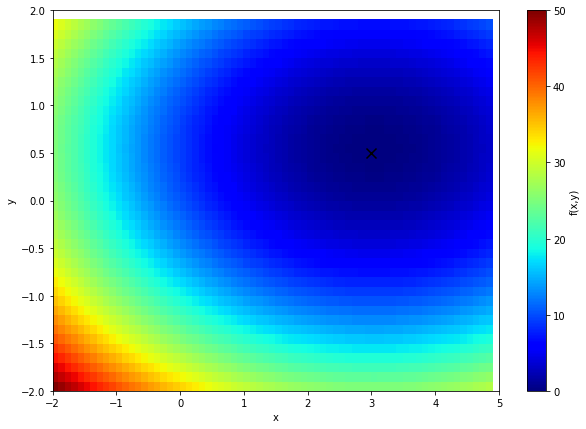

In [10]:
def fxy(x, y):
    return (x-3)**2 + (2*y-1)**2

#目的関数の値をつくる
axis_x = np.arange(-2,5,0.1)
axis_y = np.arange(-2,2,0.1)
mx, my = meshgrid(axis_x, axis_y) 
mz = fxy(mx, my)
    
#目的関数
plt.figure(figsize=(10,7))
plt.pcolor(mx,my,mz,cmap="jet")
colb = plt.colorbar()
colb.set_label("f(x,y)")

#目的関数の最小値
plt.scatter(x=3,y=0.5,marker="x",s=100,c="k")

#表示範囲
plt.xlim([-2,5])
plt.ylim([-2,2])

#描画
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [11]:
def plot(df):
    """
    結果の描画
    """
    #目的関数
    plt.figure(figsize=(10,7))
    plt.pcolor(mx,my,mz,cmap="jet")
    colb = plt.colorbar()
    colb.set_label("f(x,y)")

    #目的関数の解析的最小値
    plt.scatter(x=3,y=0.5,marker="x",s=300,c="black")

    #表示範囲
    plt.xlim([-2,5])
    plt.ylim([-2,2])

    #探索点
    plt.plot(df["x"],df["y"],marker="o",c="k")

    #描画
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

def gradient(x, y):
    """
    勾配を求める関数
    """
    dx = 2 * x - 6.0
    dy = 8.0 * y - 4.0
    return {"x":dx, "y":dy}

def func(optimizer, x_init=-1.9, y_init=-1.9, maxIter=10000, threshold=1.0e-8):
    """
    x_init : x初期値
    y_init : y初期値
    maxIter : 最大ループ回数
    threshold : 収束判定閾値
    """
        
    # 初期値の設定
    residual = 1 
    x = np.array([x_init])
    y = np.array([y_init])
    x_pre = x_init
    y_pre = y_init
    
    #結果を格納するdataframe
    i = 0 
    df_re = pd.DataFrame()
    df_re.loc[i,"x"] = x
    df_re.loc[i,"y"] = y
    df_re.loc[i,"residual"] = residual
    
    #計算
    i += 1
    while residual > threshold:
        
        params = {"x":x, "y":y}
        # 勾配の更新
        grads = gradient(x, y)         
        # 座標の更新
        optimizer.update(params, grads)
        
        x = params["x"]
        y = params["y"]
        
        residual = (x - x_pre)**2 + (y - y_pre)**2
        df_re.loc[i,"x"] = x
        df_re.loc[i,"y"] = y
        df_re.loc[i,"residual"] = residual
        i += 1

        x_pre = x.copy()
        y_pre = y.copy()
        
        if i > maxIter:
            break

    print(i, np.round(x,3), np.round(y,3), residual)
    return df_re

Nesterov AG
[0.] [0.098]
[0.] [0.192]
[0.098] [0.16807]
[0.192] [0.30912]
[0.16807] [0.21621005]
[0.30912] [0.3652032]
[0.21621005] [0.24726879]
[0.3652032] [0.37468435]
[0.24726879] [0.26515158]
[0.37468435] [0.3512516]
[0.26515158] [0.2729924]
[0.3512516] [0.30698287]
[0.2729924] [0.27329556]
[0.30698287] [0.25187882]
[0.27329556] [0.26805247]
[0.25187882] [0.19370672]
[0.26805247] [0.25883775]
[0.19370672] [0.13807143]
[0.25883775] [0.24688817]
[0.13807143] [0.08863737]
[0.24688817] [0.23316747]
[0.08863737] [0.04743688]
[0.23316747] [0.21841941]
[0.04743688] [0.01521359]
[0.21841941] [0.20321119]
[0.01521359] [-0.00823757]
[0.20321119] [0.18796893]
[-0.00823757] [-0.02375986]
[0.18796893] [0.17300649]
[-0.02375986] [-0.03256946]
[0.17300649] [0.15854896]
[-0.03256946] [-0.03604252]
[0.15854896] [0.1447517]
[-0.03604252] [-0.03555553]
[0.1447517] [0.13171568]
[-0.03555553] [-0.03237507]
[0.13171568] [0.1194999]
[-0.03237507] [-0.02759054]
[0.1194999] [0.10813129]
[-0.02759054] [-0.0

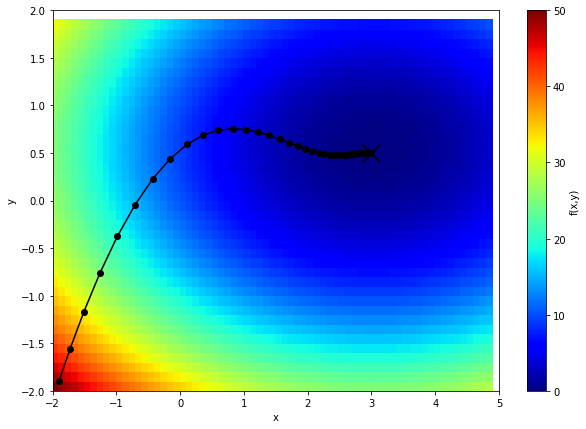

In [12]:
# print("SGD")
# optimizer = SGD(lr=0.2)
# df_re = func(optimizer)
# plot(df_re)

# print("Momentum")
# optimizer = Momentum(lr=0.01, momentum=0.75)
# df_re = func(optimizer)
# plot(df_re)

print("Nesterov AG")
optimizer = NesterovAG(lr=0.01, momentum=0.75)
df_re = func(optimizer)
plot(df_re)

# print("Adagrad")
# optimizer = Adagrad(lr=0.1)
# df_re = func(optimizer)
# plot(df_re)

# print("RMSProp")
# optimizer = RMSProp(lr=0.1,rho=0.9)
# df_re = func(optimizer)
# plot(df_re)

# print("Adadelta")
# optimizer = Adadelta(rho=0.95)
# df_re = func(optimizer)
# plot(df_re)

# print("Adam")
# optimizer = Adam(lr=0.1)
# df_re = func(optimizer)
# plot(df_re)

### [演習]
* 学習率やモーメンタム係数を変更して、結果がどのように変わるか確認しましょう。
* 手法、学習率、係数をいろいろ変化させて、収束までのステップ回数を比較してみましょう。一覧表をつくると比較しやすいでしょう。